# REGRESSION MODELS

>**Regression analysis** is a statistical method used to understand and quantify the relationship between two or more variables. It helps businesses estimate one dependent variable based on the values of one or more independent variables. This helps determine how changes in one variable are associated with changes in another, allowing for predictions or understanding the impact of different factors on an outcome. Data collection, preprocessing, and model selection are crucial phases in regression analysis. It can also be used for multiple regression, where multiple independent variables are considered, making it useful in real-world scenarios where various factors influence outcomes.

>

### How to Perform Regression Analysis?

+ **Data collection and preparation:** Gather and clean data, ensuring it meets assumptions like linearity and independence.
+ **Selecting the appropriate regression model:** Choose the correct type of regression (linear, polynomial, logistic, etc.) based on the data and research objectives.
+ **Data analysis and interpretation:** Analyse results, assess model accuracy, and interpret coefficients to draw meaningful conclusions.
+ **Model evaluation and validation:** Test the model's performance using metrics like R-squared, mean-squared error, or cross-validation.

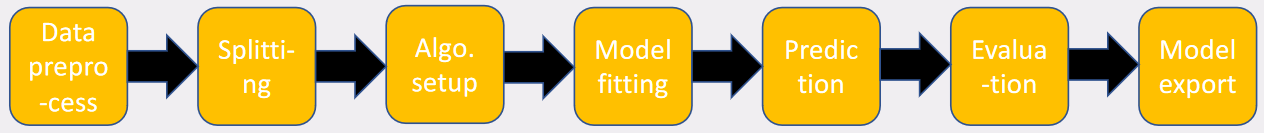

>

### Common Types of Variables in Machine Learning 

***
**Dependent variable (Label)**

is the outcome of a study, such as quarterly sales figures or customer satisfaction ratings, and is the result of the influence of other factors. To identify it, consider whether it's the end result of the analysis, depends on other variables, and is measured after changes have been made.

***
**Independent variables (Features)** 

are factors that can influence or cause changes in the dependent variable. They can be manipulated or observed to observe their impact on the outcome of interest. For instance, adjusting a product's price could affect sales figures. To determine if a variable is independent, consider whether it is controlled or changed, if it precedes the dependent variable in time, and if it's being studied.

## I.  LINEAR REGRESSION

### I.1.   Simple Linear Regression

>**Simple linear regression (SLR)** is a statistical method used to model the relationship between two variables, with one being the independent variable and the other being the dependent variable. It is commonly used in business to predict sales based on advertising expenditure or estimate employee productivity.  In linear regression analysis, a straight line is drawn in the scatter plot. To determine this straight line, linear regression uses the ***method of Ordinary Least Squares (OLS)***. 

The regression line can be described by the following equation: 

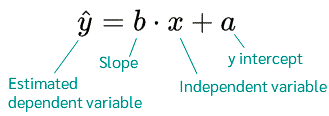   Where: **a =** point of intersection with the y-axis,  **b =** gradient of the straight line, **ŷ** is the respective estimate of the y-value. This means that for each x-value the corresponding y-value is estimated.



In this example, it means that the height of people is used to estimate their weight. 

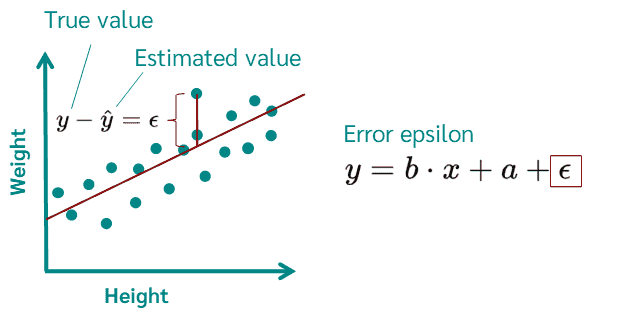 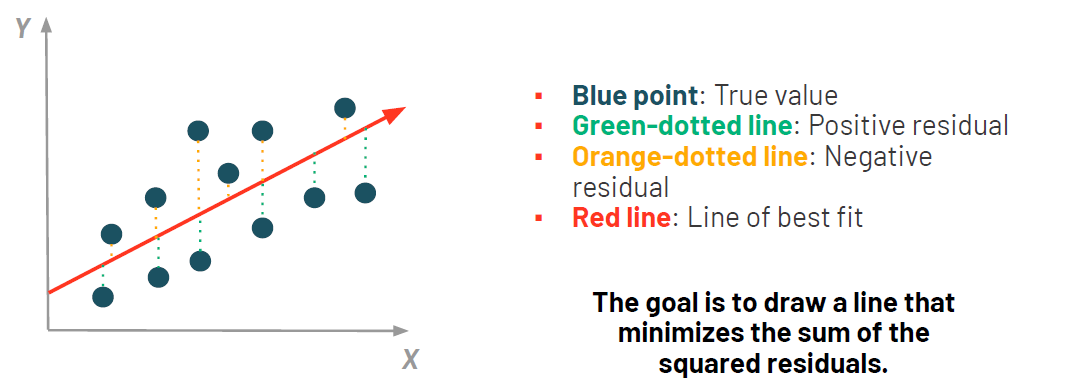

### I.2.  SLR Implementation

In our demonstration of a SLR, we are going to try predicting the CO2EMISSIONS, according to the ENGINESIZE of vehicles. Meaning that, our Dependant (label) variable is the CO2EMISSION level, and the Independant (feature) variable will be the engine sizes of the different vehicles.

**Step 1: Import Required Libraries and Create SparkSession**

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator



In [55]:
# Create a new Sparksession
spark = SparkSession\
    .builder\
    .appName('Simple_Linear_Regression_Model')\
    .getOrCreate()

**Step 2: Load the Data**

In [56]:
path = "FuelConsumption.csv"
path1 = "C:/Users/andye/Documents/iungo Skills Bootcamp/glassdoor.csv"

df = spark.read.csv(path, header=True, inferSchema=True)

df.show(5)

+---------+-----+----------+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|MODELYEAR| MAKE|     MODEL|VEHICLECLASS|ENGINESIZE|CYLINDERS|TRANSMISSION|FUELTYPE|FUELCONSUMPTION_CITY|FUELCONSUMPTION_HWY|FUELCONSUMPTION_COMB|FUELCONSUMPTION_COMB_MPG|CO2EMISSIONS|
+---------+-----+----------+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|     2014|ACURA|       ILX|     COMPACT|       2.0|        4|         AS5|       Z|                 9.9|                6.7|                 8.5|                      33|         196|
|     2014|ACURA|       ILX|     COMPACT|       2.4|        4|          M6|       Z|                11.2|                7.7|                 9.6|                      29|         221|
|     2014|ACURA|ILX HYBRID|     COMPACT|       1.5|        4|         AV7|

**Step 3:Prepare the Data**

Create a subset of our dataset, selecting only the most relevant features for the analysis

In [57]:
df_SimpleLinearRegression = df.select("ENGINESIZE", "CO2EMISSIONS")

df_SimpleLinearRegression.show(5)

df_SimpleLinearRegression.describe().show()

+----------+------------+
|ENGINESIZE|CO2EMISSIONS|
+----------+------------+
|       2.0|         196|
|       2.4|         221|
|       1.5|         136|
|       3.5|         255|
|       3.5|         244|
+----------+------------+
only showing top 5 rows

+-------+------------------+-----------------+
|summary|        ENGINESIZE|     CO2EMISSIONS|
+-------+------------------+-----------------+
|  count|              1067|             1067|
|   mean|3.3462980318650346|256.2286785379569|
| stddev|1.4158950514240645|63.37230444279997|
|    min|               1.0|              108|
|    max|               8.4|              488|
+-------+------------------+-----------------+



checking and dropping NULL values

In [58]:
for column in df.columns:
    missing_value = df.filter(F.col(column).isNull()).count()
    print(f"{column} has {missing_value} missing values")

MODELYEAR has 0 missing values
MAKE has 0 missing values
MODEL has 0 missing values
VEHICLECLASS has 0 missing values
ENGINESIZE has 0 missing values
CYLINDERS has 0 missing values
TRANSMISSION has 0 missing values
FUELTYPE has 0 missing values
FUELCONSUMPTION_CITY has 0 missing values
FUELCONSUMPTION_HWY has 0 missing values
FUELCONSUMPTION_COMB has 0 missing values
FUELCONSUMPTION_COMB_MPG has 0 missing values
CO2EMISSIONS has 0 missing values


In [59]:
null_value = df.select([F.sum(F.col(column).isNull().cast('int')).alias(column) for column in df.columns])
null_value.show()


+---------+----+-----+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|MODELYEAR|MAKE|MODEL|VEHICLECLASS|ENGINESIZE|CYLINDERS|TRANSMISSION|FUELTYPE|FUELCONSUMPTION_CITY|FUELCONSUMPTION_HWY|FUELCONSUMPTION_COMB|FUELCONSUMPTION_COMB_MPG|CO2EMISSIONS|
+---------+----+-----+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|        0|   0|    0|           0|         0|        0|           0|       0|                   0|                  0|                   0|                       0|           0|
+---------+----+-----+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+



> **Let's explore the correlation between the input and the output variable**

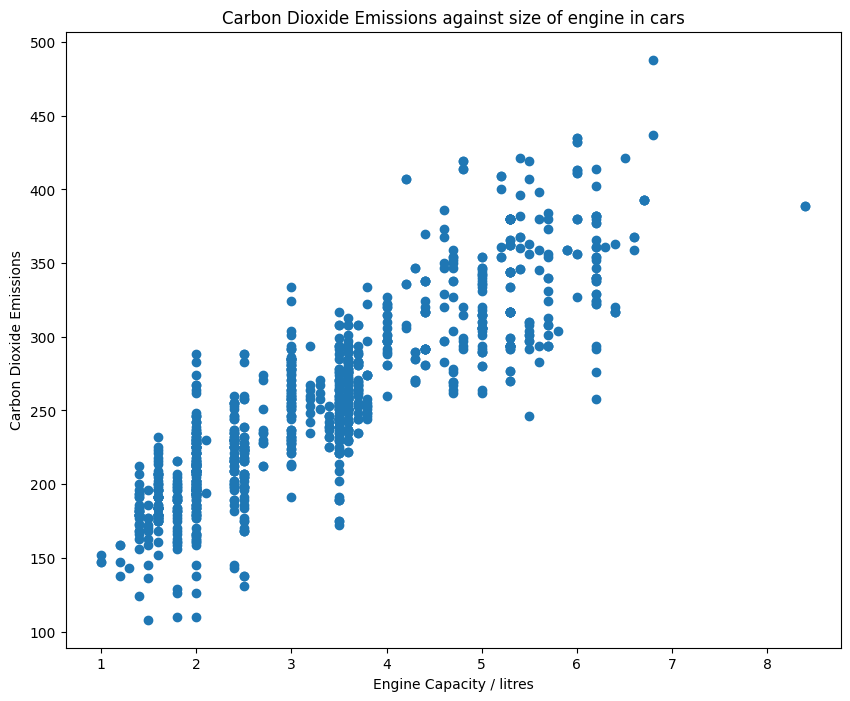

In [60]:
pandas_df = df_SimpleLinearRegression.toPandas()

plt.figure(figsize=(10, 8))
plt.scatter(pandas_df['ENGINESIZE'], pandas_df['CO2EMISSIONS'])

plt.xlabel('Engine Capacity / litres')
plt.ylabel('Carbon Dioxide Emissions')

plt.title('Carbon Dioxide Emissions against size of engine in cars')
plt.show()

In [61]:
df_SimpleLinearRegression.printSchema()



root
 |-- ENGINESIZE: double (nullable = true)
 |-- CO2EMISSIONS: integer (nullable = true)



**Prepare the data for simple linear regression**

MLlib requires the predictor variables to be in a single features column as a vector.

In [62]:
assembler = VectorAssembler(inputCols=['ENGINESIZE'], outputCol='features')
data = assembler.transform(df_SimpleLinearRegression)
data.show()

+----------+------------+--------+
|ENGINESIZE|CO2EMISSIONS|features|
+----------+------------+--------+
|       2.0|         196|   [2.0]|
|       2.4|         221|   [2.4]|
|       1.5|         136|   [1.5]|
|       3.5|         255|   [3.5]|
|       3.5|         244|   [3.5]|
|       3.5|         230|   [3.5]|
|       3.5|         232|   [3.5]|
|       3.7|         255|   [3.7]|
|       3.7|         267|   [3.7]|
|       2.4|         212|   [2.4]|
|       2.4|         225|   [2.4]|
|       3.5|         239|   [3.5]|
|       5.9|         359|   [5.9]|
|       5.9|         359|   [5.9]|
|       4.7|         338|   [4.7]|
|       4.7|         354|   [4.7]|
|       4.7|         338|   [4.7]|
|       4.7|         354|   [4.7]|
|       5.9|         359|   [5.9]|
|       2.0|         202|   [2.0]|
+----------+------------+--------+
only showing top 20 rows



**Split the data into training and testing sets**

In [63]:
training_data, test_data = data.randomSplit([0.8, 0.2], seed = 42)

**Create and train the linear regression model**

In [64]:
SimpleLinearRegression = LinearRegression(featuresCol='features', labelCol='CO2EMISSIONS')

#Let's build our simple linear regressuon model by fitting our SLR estimator
LinearRegression_model = SimpleLinearRegression.fit(training_data)



**Print the model coefficients and intercept**

In [65]:
CoefficientOfLinerRegression = LinearRegression_model.coefficients
intercept = LinearRegression_model.intercept


print('Coefficient of Linear Regression:', CoefficientOfLinerRegression)
print('Intercept', intercept)


Coefficient of Linear Regression: [39.383296346226125]
Intercept 124.73600850980912


**Make predictions on the test data**

+----------+------------+--------+------------------+
|ENGINESIZE|CO2EMISSIONS|features|        prediction|
+----------+------------+--------+------------------+
|       1.0|         152|   [1.0]|164.11930485603526|
|       1.2|         159|   [1.2]|171.99596412528047|
|       1.4|         124|   [1.4]| 179.8726233945257|
|       1.4|         168|   [1.4]| 179.8726233945257|
|       1.4|         179|   [1.4]| 179.8726233945257|
|       1.4|         182|   [1.4]| 179.8726233945257|
|       1.4|         186|   [1.4]| 179.8726233945257|
|       1.4|         200|   [1.4]| 179.8726233945257|
|       1.5|         172|   [1.5]|183.81095302914832|
|       1.5|         177|   [1.5]|183.81095302914832|
|       1.5|         177|   [1.5]|183.81095302914832|
|       1.5|         196|   [1.5]|183.81095302914832|
|       1.6|         161|   [1.6]|187.74928266377094|
|       1.6|         175|   [1.6]|187.74928266377094|
|       1.6|         177|   [1.6]|187.74928266377094|
|       1.6|         179|   

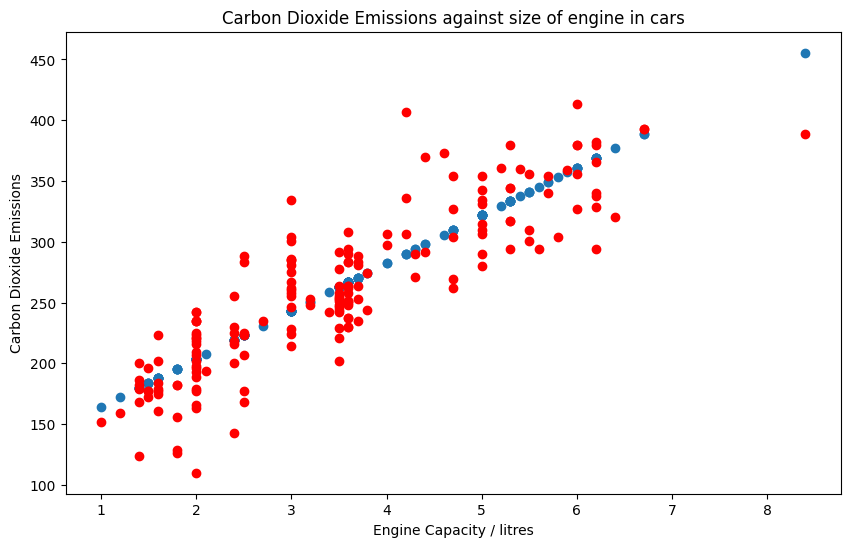

In [66]:
SimpleLinearRegression_prediction = LinearRegression_model.transform(test_data)
SimpleLinearRegression_prediction.show()

pandas_df = SimpleLinearRegression_prediction.toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['ENGINESIZE'], pandas_df['prediction'])
plt.scatter(pandas_df['ENGINESIZE'], pandas_df['CO2EMISSIONS'], color = 'red')

plt.xlabel('Engine Capacity / litres')
plt.ylabel('Carbon Dioxide Emissions')

plt.title('Carbon Dioxide Emissions against size of engine in cars')
plt.show()



**APPLICATION:** Choose another relevant input feature that could be used to predict the CO2 Emission, perform a SLR and compare the 1st five predicted values with what we just did.

>

In [67]:
df_FuelConsumption_SimpleLinearRegression = df.select("FUELCONSUMPTION_COMB", "CO2EMISSIONS")

df_FuelConsumption_SimpleLinearRegression.show(5)

df_FuelConsumption_SimpleLinearRegression.describe().show()

+--------------------+------------+
|FUELCONSUMPTION_COMB|CO2EMISSIONS|
+--------------------+------------+
|                 8.5|         196|
|                 9.6|         221|
|                 5.9|         136|
|                11.1|         255|
|                10.6|         244|
+--------------------+------------+
only showing top 5 rows

+-------+--------------------+-----------------+
|summary|FUELCONSUMPTION_COMB|     CO2EMISSIONS|
+-------+--------------------+-----------------+
|  count|                1067|             1067|
|   mean|  11.580880974695416|256.2286785379569|
| stddev|    3.48559484963484|63.37230444279997|
|    min|                 4.7|              108|
|    max|                25.8|              488|
+-------+--------------------+-----------------+



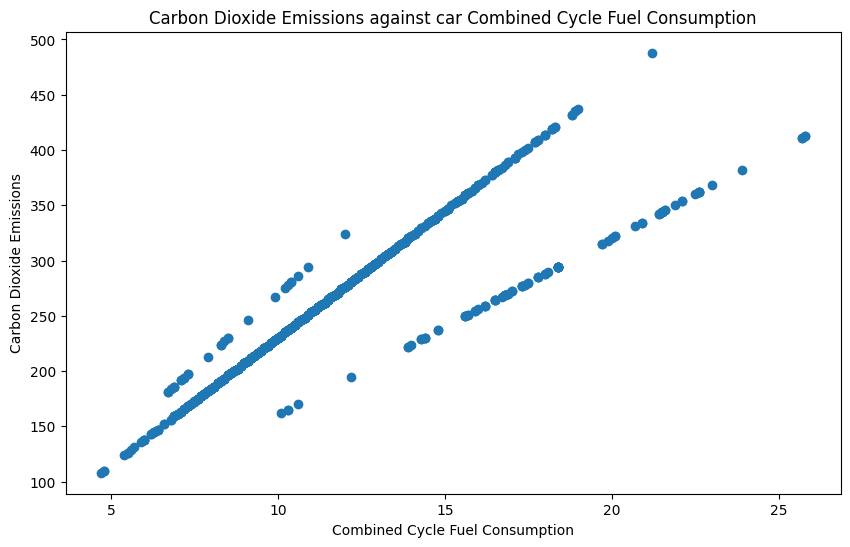

In [68]:
FuelConsumption_pandas_df = df_FuelConsumption_SimpleLinearRegression.toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(FuelConsumption_pandas_df['FUELCONSUMPTION_COMB'], FuelConsumption_pandas_df['CO2EMISSIONS'])

plt.xlabel('Combined Cycle Fuel Consumption')
plt.ylabel('Carbon Dioxide Emissions')

plt.title('Carbon Dioxide Emissions against car Combined Cycle Fuel Consumption')
plt.show()

In [69]:
#**Prepare the data for simple linear regression**
#MLlib requires the predictor variables to be in a single features column as a vector.

FuelConsumption_Assembler = VectorAssembler(inputCols=['FUELCONSUMPTION_COMB'], outputCol='features')
FuelConsumption_data = FuelConsumption_Assembler.transform(df_FuelConsumption_SimpleLinearRegression)
FuelConsumption_data.show()

+--------------------+------------+--------+
|FUELCONSUMPTION_COMB|CO2EMISSIONS|features|
+--------------------+------------+--------+
|                 8.5|         196|   [8.5]|
|                 9.6|         221|   [9.6]|
|                 5.9|         136|   [5.9]|
|                11.1|         255|  [11.1]|
|                10.6|         244|  [10.6]|
|                10.0|         230|  [10.0]|
|                10.1|         232|  [10.1]|
|                11.1|         255|  [11.1]|
|                11.6|         267|  [11.6]|
|                 9.2|         212|   [9.2]|
|                 9.8|         225|   [9.8]|
|                10.4|         239|  [10.4]|
|                15.6|         359|  [15.6]|
|                15.6|         359|  [15.6]|
|                14.7|         338|  [14.7]|
|                15.4|         354|  [15.4]|
|                14.7|         338|  [14.7]|
|                15.4|         354|  [15.4]|
|                15.6|         359|  [15.6]|
|         

In [70]:
#**Split the data into training and testing sets**
FuelConsumption_training_data, FuelConsumption_test_data = FuelConsumption_data.randomSplit([0.8, 0.2], seed = 42)

#**Create and train the linear regression model**
FuelConsumption_SimpleLinearRegression = LinearRegression(featuresCol='features', labelCol='CO2EMISSIONS')

In [71]:
#Let's build our simple linear regressuon model by fitting our SLR estimator
FuelConsumption_LinearRegression_model = FuelConsumption_SimpleLinearRegression.fit(FuelConsumption_training_data)

#**Print the model coefficients and intercept**
FuelConsumption_CoefficientOfLinerRegression = FuelConsumption_LinearRegression_model.coefficients
FuelConsumption_intercept = FuelConsumption_LinearRegression_model.intercept


print('Coefficient of Linear Regression:', FuelConsumption_CoefficientOfLinerRegression)
print('Intercept', FuelConsumption_intercept)


Coefficient of Linear Regression: [16.34813125703531]
Intercept 67.13950461002187


+--------------------+------------+--------+------------------+
|FUELCONSUMPTION_COMB|CO2EMISSIONS|features|        prediction|
+--------------------+------------+--------+------------------+
|                 4.8|         110|   [4.8]|145.61053464379137|
|                 5.6|         129|   [5.6]| 158.6890396494196|
|                 5.9|         136|   [5.9]| 163.5934790265302|
|                 6.2|         143|   [6.2]| 168.4979184036408|
|                 6.4|         147|   [6.4]|171.76754465504786|
|                 6.7|         181|   [6.7]|176.67198403215843|
|                 6.9|         159|   [6.9]|179.94161028356552|
|                 6.9|         186|   [6.9]|179.94161028356552|
|                 7.1|         192|   [7.1]|183.21123653497256|
|                 7.1|         192|   [7.1]|183.21123653497256|
|                 7.2|         166|   [7.2]| 184.8460496606761|
|                 7.2|         166|   [7.2]| 184.8460496606761|
|                 7.2|         166|   [7

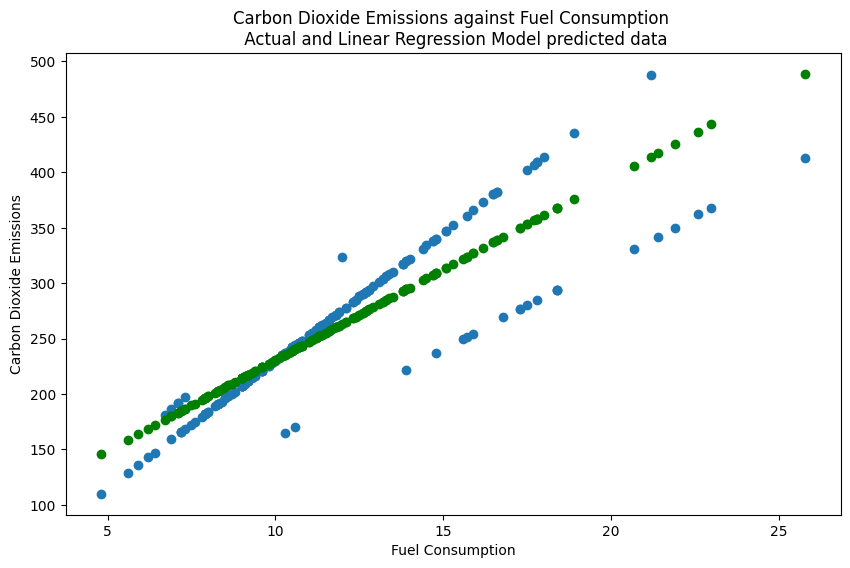

In [72]:
#**Make predictions on the test data**
FuelConsumption_SimpleLinearRegression_prediction = FuelConsumption_LinearRegression_model.transform(FuelConsumption_test_data)
FuelConsumption_SimpleLinearRegression_prediction.show()

FuelConsumption_pandas_df = FuelConsumption_SimpleLinearRegression_prediction.toPandas()

plt.figure(figsize=(10, 6))
plt.scatter(FuelConsumption_pandas_df['FUELCONSUMPTION_COMB'], FuelConsumption_pandas_df['CO2EMISSIONS'])
plt.scatter(FuelConsumption_pandas_df['FUELCONSUMPTION_COMB'], FuelConsumption_pandas_df['prediction'], color = 'green')



plt.xlabel('Fuel Consumption')
plt.ylabel('Carbon Dioxide Emissions')
plt.legend
plt.title('Carbon Dioxide Emissions against Fuel Consumption \n Actual and Linear Regression Model predicted data')
plt.show()


In [41]:
# Step 8: Evaluate the Model
SLR_evaluator_rmse = RegressionEvaluator(labelCol="CO2EMISSIONS", predictionCol="prediction", metricName="rmse")
SLR_evaluator_mae = RegressionEvaluator(labelCol="CO2EMISSIONS", predictionCol="prediction", metricName="mae")
SLR_evaluator_r2 = RegressionEvaluator(labelCol="CO2EMISSIONS", predictionCol="prediction", metricName="r2")

SLR_rmse = SLR_evaluator_rmse.evaluate(FuelConsumption_SimpleLinearRegression_prediction)
SLR_mae = SLR_evaluator_mae.evaluate(FuelConsumption_SimpleLinearRegression_prediction)
SLR_r2 = SLR_evaluator_r2.evaluate(FuelConsumption_SimpleLinearRegression_prediction)

print(f"SLR Prediction Root Mean Squared Error (RMSE): {SLR_rmse}")
print(f"SLR Prediction Mean Absolute Error (MAE): {SLR_mae}")
print(f"SLR Prediction R² (R-squared): {SLR_r2}")

SLR Prediction Root Mean Squared Error (RMSE): 32.004924934574966
SLR Prediction Mean Absolute Error (MAE): 22.620097411565805
SLR Prediction R² (R-squared): 0.7712903347752389


In [42]:
spark.stop()

### I.3. Multiple Linear Regression

>Multiple linear regression involves considering multiple independent variables to estimate a dependent variable, while the independent variables are used for prediction, unlike simple linear regression which considers only two variables.

>Multiple linear regression is frequently used in empirical social research as well as in market research. In both areas it is of interest to find out what influence different factors have on a variable. For example, what determinants influence a person's health or purchasing behavior? 

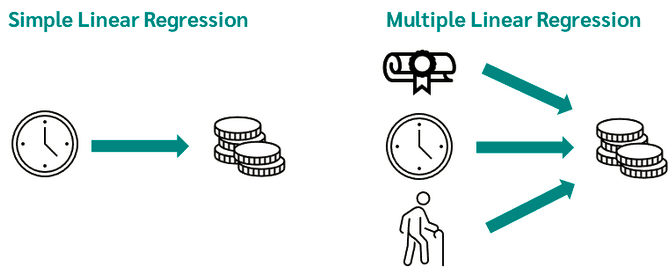


***
**Marketing example:**

For a video streaming service you should predict how many times a month a person streams videos. For this you get a record of user's data (age, income, gender, ...).
***

**Medical example:**

You want to find out which factors have an influence on the cholesterol level of patients. For this purpose, you analyze a patient data set with cholesterol level, age, hours of sport per week and so on.
***



>

The equation necessary for the calculation of a multiple regression is obtained with k dependent variables as: 

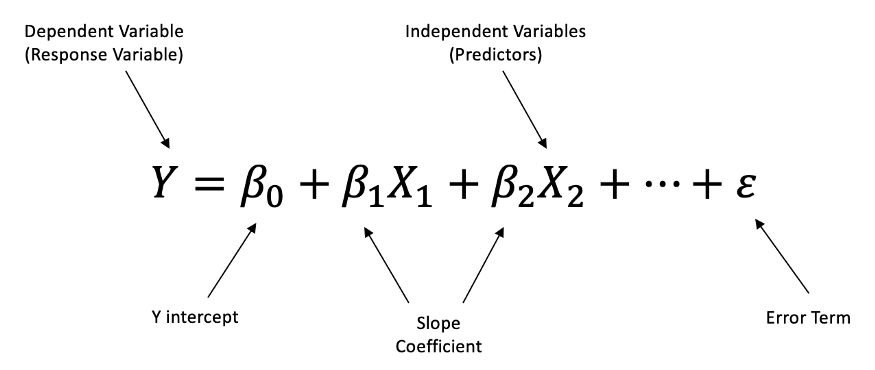


+ **y =** the predicted value of the dependent variable
+ **B_0 =** the y-intercept (value of y when all other parameters are set to 0)
+ **B_1X_1 =** the regression coefficient (B_1) of the first independent variable (X_1) (a.k.a. the effect that increasing the value of the independent variable has on the predicted y value)
+ **… =** do the same for however many independent variables you are testing
+ **B_nX_n =** the regression coefficient of the last independent variable
+ **\epsilon =** model error (a.k.a. how much variation there is in our estimate of y)


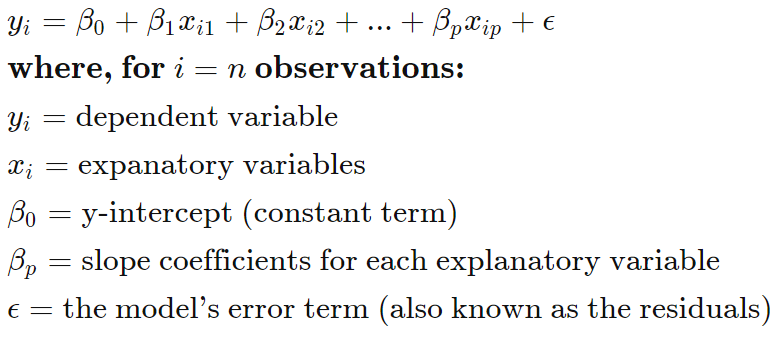

Assumptions of Multiple Linear Regression

Multiple linear regression is based on the following assumptions:
1. A linear relationship between the dependent and independent variables

The first assumption of multiple linear regression is that there is a linear relationship between the dependent variable and each of the independent variables. The best way to check the linear relationships is to create scatterplots and then visually inspect the scatterplots for linearity. If the relationship displayed in the scatterplot is not linear, then the analyst will need to run a non-linear regression or transform the data using statistical software, such as SPSS.

2. The independent variables are not highly correlated with each other

The data should not show multicollinearity, which occurs when the independent variables (explanatory variables) are highly correlated. When independent variables show multicollinearity, there will be problems figuring out the specific variable that contributes to the variance in the dependent variable. The best method to test for the assumption is the Variance Inflation Factor method.

3. The variance of the residuals is constant

Multiple linear regression assumes that the amount of error in the residuals is similar at each point of the linear model. This scenario is known as homoscedasticity. When analyzing the data, the analyst should plot the standardized residuals against the predicted values to determine if the points are distributed fairly across all the values of independent variables. To test the assumption, the data can be plotted on a scatterplot or by using statistical software to produce a scatterplot that includes the entire model.

4. Independence of observation

The model assumes that the observations should be independent of one another. Simply put, the model assumes that the values of residuals are independent. To test for this assumption, we use the Durbin Watson statistic.

The test will show values from 0 to 4, where a value of 0 to 2 shows positive autocorrelation, and values from 2 to 4 show negative autocorrelation. The mid-point, i.e., a value of 2, shows that there is no autocorrelation.

5. Multivariate normality

Multivariate normality occurs when residuals are normally distributed. To test this assumption, look at how the values of residuals are distributed. It can also be tested using two main methods, i.e., a histogram with a superimposed normal curve or the Normal Probability Plot method.

**Step 1:** Load Data and Initialize Spark Session

In [43]:
# Create SparkSession
spark = SparkSession \
    .builder \
        .appName("MultipleLinearRegression") \
            .getOrCreate()

#Load the Data
path = "FuelConsumption.csv"
df = spark.read.csv(path, header=True, inferSchema=True)

df.show(5)


+---------+-----+----------+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|MODELYEAR| MAKE|     MODEL|VEHICLECLASS|ENGINESIZE|CYLINDERS|TRANSMISSION|FUELTYPE|FUELCONSUMPTION_CITY|FUELCONSUMPTION_HWY|FUELCONSUMPTION_COMB|FUELCONSUMPTION_COMB_MPG|CO2EMISSIONS|
+---------+-----+----------+------------+----------+---------+------------+--------+--------------------+-------------------+--------------------+------------------------+------------+
|     2014|ACURA|       ILX|     COMPACT|       2.0|        4|         AS5|       Z|                 9.9|                6.7|                 8.5|                      33|         196|
|     2014|ACURA|       ILX|     COMPACT|       2.4|        4|          M6|       Z|                11.2|                7.7|                 9.6|                      29|         221|
|     2014|ACURA|ILX HYBRID|     COMPACT|       1.5|        4|         AV7|

**Step 2:** Data Preparation

+ **Select Relevant Columns:** We will filter only the ENGINESIZE, CYLINDERS and FUELCONSUMPTION_COMB columns for the regression model.
+ **Handle Missing Values:** We gonna drop rows or fill missing values in predictors or input columns.
+ **Assemble Features:** We'll combine predictors into a single features vector using VectorAssembler.

In [44]:
# Select relevant features for predicting CO2EMISSIONS
#Create a subset of our dataset, selecting only the most relevant features for the analysis

df_MultipleLinearRegression = df.select("ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS")

df_MultipleLinearRegression.show(5)

df_MultipleLinearRegression.describe().show()

# Handle missing values (if any)
for column in df_MultipleLinearRegression.columns:
    missing_value = df_MultipleLinearRegression.filter(F.col(column).isNull()).count()
    print(f"{column} has {missing_value} missing values")

#Assemble Features: We'll combine predictors into a single features vector using VectorAssembler.
assembler = VectorAssembler(inputCols=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB'], outputCol='features')
data = assembler.transform(df_MultipleLinearRegression)#.select('CO2EMISSIONS', 'features')
data.show()



+----------+---------+--------------------+------------+
|ENGINESIZE|CYLINDERS|FUELCONSUMPTION_COMB|CO2EMISSIONS|
+----------+---------+--------------------+------------+
|       2.0|        4|                 8.5|         196|
|       2.4|        4|                 9.6|         221|
|       1.5|        4|                 5.9|         136|
|       3.5|        6|                11.1|         255|
|       3.5|        6|                10.6|         244|
+----------+---------+--------------------+------------+
only showing top 5 rows

+-------+------------------+------------------+--------------------+-----------------+
|summary|        ENGINESIZE|         CYLINDERS|FUELCONSUMPTION_COMB|     CO2EMISSIONS|
+-------+------------------+------------------+--------------------+-----------------+
|  count|              1067|              1067|                1067|             1067|
|   mean|3.3462980318650346| 5.794751640112465|  11.580880974695416|256.2286785379569|
| stddev|1.4158950514240645

**Step 3:** Train-Test Split

In [45]:
#**Split the data into training and testing sets**
training_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

**Step 4:** Train the Multiple Linear Regression Model

In [46]:
#**Step 4:** Train the Multiple Linear Regression Model
MultipleLinearRegression = LinearRegression(featuresCol='features', labelCol='CO2EMISSIONS')


# Let's build our  Multiple Linear Regression  model by fitting our Multiple Linear Regression  estimator
mlr_model = MultipleLinearRegression.fit(training_data)


Calculate the intercept and the different coefficients

In [47]:
#Calculate the model coefficients and intercept
CoefficientsOfMultipleLinerRegression = mlr_model.coefficients
MLR_intercept = mlr_model.intercept

#Print the model coefficients and intercept**
CoefficientIndex = 0
for  Coefficient in CoefficientsOfMultipleLinerRegression:
    print(f"Coefficient beta{str(CoefficientIndex+1)}: {str(CoefficientsOfMultipleLinerRegression[CoefficientIndex])}")
    CoefficientIndex+=1

print('Intercept', MLR_intercept)



Coefficient beta1: 10.39643979580147
Coefficient beta2: 7.870582501834508
Coefficient beta3: 9.457554938625346
Intercept 66.23791854165356


**EXERCISE:** Use the intercept and the different coefficients, to write the equation of the multiple regression line of your output feature

In [48]:
print('Equation of multiple regression line of this output feature:')
ExplanatoryVariableNameX1 = "ENGINESIZE"
ExplanatoryVariableNameX2 = "CYLINDERS"
ExplanatoryVariableNameX3 = "FUELCONSUMPTION_COMB"
print(f"y = beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3")
print(f'Where beta0 is the intercept, x1 is {ExplanatoryVariableNameX1}, x2 is {ExplanatoryVariableNameX2} and beta3 is {ExplanatoryVariableNameX3}')
print(f'So, equation of line is y = {round(MLR_intercept,3)} + {round(CoefficientsOfMultipleLinerRegression[0],3)}*{ExplanatoryVariableNameX1} + {round(CoefficientsOfMultipleLinerRegression[1],3)}*{ExplanatoryVariableNameX2} + {round(CoefficientsOfMultipleLinerRegression[2],3)}*{ExplanatoryVariableNameX3}')

Equation of multiple regression line of this output feature:
y = beta0 + beta1 * x1 + beta2 * x2 + beta3 * x3
Where beta0 is the intercept, x1 is ENGINESIZE, x2 is CYLINDERS and beta3 is FUELCONSUMPTION_COMB
So, equation of line is y = 66.238 + 10.396*ENGINESIZE + 7.871*CYLINDERS + 9.458*FUELCONSUMPTION_COMB


**Step 5:** Make Predictions

In [49]:
#**Make predictions on the test data**
MultipleLinearRegression_prediction = mlr_model.transform(test_data)
MultipleLinearRegression_prediction.show(5)

MLR_pandas_df = MultipleLinearRegression_prediction.toPandas()


+----------+---------+--------------------+------------+-------------+------------------+
|ENGINESIZE|CYLINDERS|FUELCONSUMPTION_COMB|CO2EMISSIONS|     features|        prediction|
+----------+---------+--------------------+------------+-------------+------------------+
|       1.0|        4|                 6.6|         152|[1.0,4.0,6.6]|170.53655093972034|
|       1.2|        4|                 6.9|         159|[1.2,4.0,6.9]|175.45310538046826|
|       1.4|        4|                 5.4|         124|[1.4,4.0,5.4]|163.34606093169052|
|       1.4|        4|                 7.3|         168|[1.4,4.0,7.3]|181.31541531507867|
|       1.4|        4|                 7.8|         179|[1.4,4.0,7.8]|186.04419278439133|
+----------+---------+--------------------+------------+-------------+------------------+
only showing top 5 rows



**Plot the data as a graph**


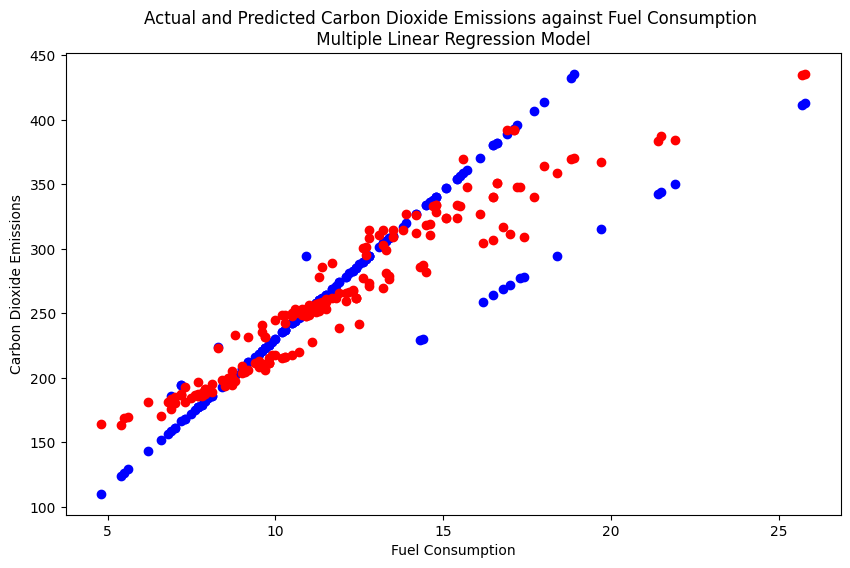

In [76]:
#Plot the data as a graph
plt.figure(figsize=(10, 6))
plt.scatter(MLR_pandas_df['FUELCONSUMPTION_COMB'], MLR_pandas_df['CO2EMISSIONS'], color='blue' )
plt.scatter(MLR_pandas_df['FUELCONSUMPTION_COMB'], MLR_pandas_df['prediction'], color='red')
#plt.scatter(FuelConsumption_pandas_df['FUELCONSUMPTION_COMB'], FuelConsumption_pandas_df['prediction'], color = 'green')


plt.xlabel('Fuel Consumption')
plt.ylabel('Carbon Dioxide Emissions')

plt.title('Actual and Predicted Carbon Dioxide Emissions against Fuel Consumption \n Multiple Linear Regression Model ')

plt.show()

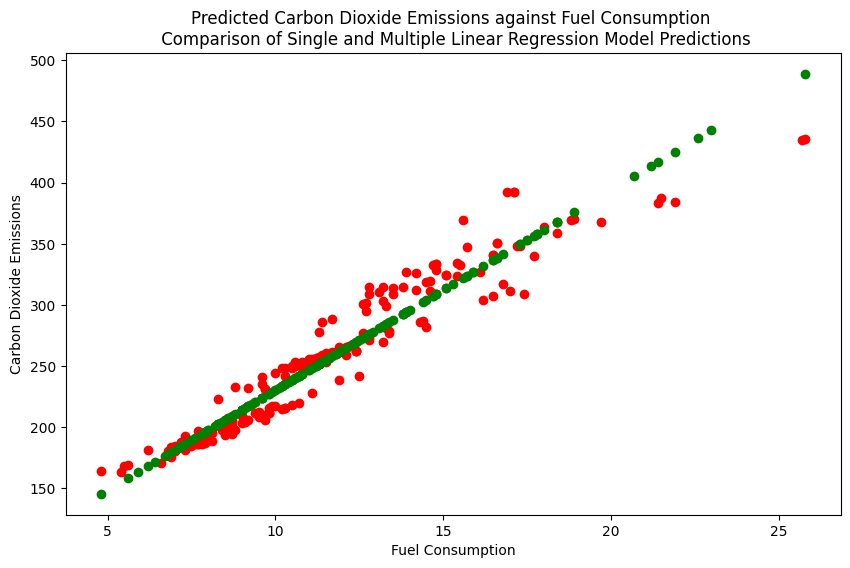

In [77]:
#Comapare the predictions

#Plot the data as a graph
plt.figure(figsize=(10, 6))
#plt.scatter(MLR_pandas_df['FUELCONSUMPTION_COMB'], MLR_pandas_df['CO2EMISSIONS'], color='blue' )
plt.scatter(MLR_pandas_df['FUELCONSUMPTION_COMB'], MLR_pandas_df['prediction'], color='red')
plt.scatter(FuelConsumption_pandas_df['FUELCONSUMPTION_COMB'], FuelConsumption_pandas_df['prediction'], color = 'green')


plt.xlabel('Fuel Consumption')
plt.ylabel('Carbon Dioxide Emissions')

plt.title('Predicted Carbon Dioxide Emissions against Fuel Consumption \n Comparison of Single and Multiple Linear Regression Model Predictions')

plt.show()

**EXERCISE:** What can you say about the predicted CO2 emissions when 1 input feature is used, compared to when many factors are involved?

In [74]:
# Evaluation of the model
MLR_evaluator_rmse = RegressionEvaluator(labelCol="CO2EMISSIONS", predictionCol="prediction", metricName="rmse")
MLR_evaluator_mae = RegressionEvaluator(labelCol="CO2EMISSIONS", predictionCol="prediction", metricName="mae")
MLR_evaluator_r2 = RegressionEvaluator(labelCol="CO2EMISSIONS", predictionCol="prediction", metricName="r2")

MLR_rmse = MLR_evaluator_rmse.evaluate(MultipleLinearRegression_prediction)
MLR_mae = MLR_evaluator_mae.evaluate(MultipleLinearRegression_prediction)
MLR_r2 = MLR_evaluator_r2.evaluate(MultipleLinearRegression_prediction)

print(f"MLR Prediction Root Mean Squared Error (RMSE): {MLR_rmse}")
print(f"MLR Prediction Mean Absolute Error (MAE): {MLR_mae}")
print(f"MLR Prediction R² (R-squared): {MLR_r2}")

MLR Prediction Root Mean Squared Error (RMSE): 24.036056142319268
MLR Prediction Mean Absolute Error (MAE): 17.829342265981804
MLR Prediction R² (R-squared): 0.8752871669245768


In [ ]:
spark.stop()

# LINEAR REGRESSION MODEL WITH NON-NUMERIC FEATURES

**Types of non-numeric features:**

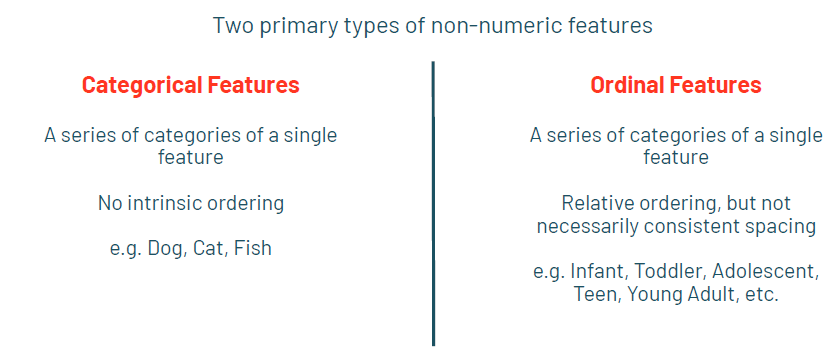

**Problematic:**

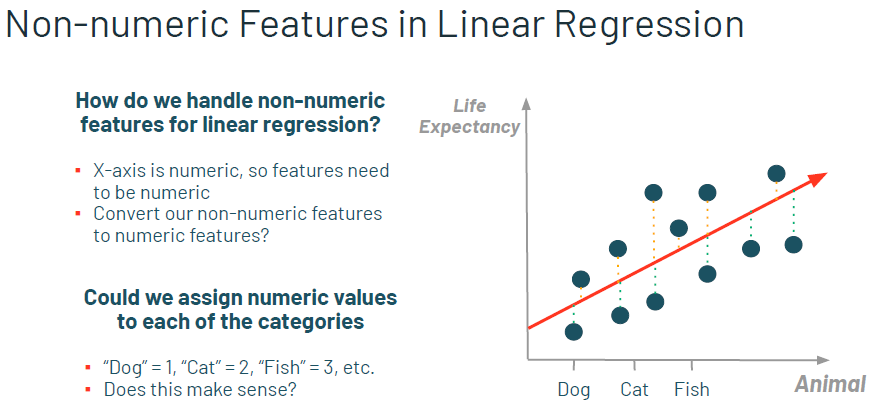

This implies that 1 cat equals 2 dogs!

**Getting all the useful libraries**

In [ ]:
import os
os.environ["PYSPARK_PYTHON"] = "python"

from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
import pyspark.sql.functions as F
import pyspark.sql.types as T
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, OneHotEncoder, VectorAssembler, StringIndexer, IDF,HashingTF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator,TrainValidationSplit, ParamGridBuilder




**Step 1: Data Preparation**

First, we'll create a Sparksession and select only the relevant column for our analysis, which is the "ReviewId" and "Feedback" column:

In [ ]:

# Create a SparkSession
spark = SparkSession \
    .builder \
        .appName("GlassdoorAnalysis") \
            .getOrCreate()


**Step 1: Relevant Columns**

+ **Age:** Older employees might have higher income due to seniority.
+ **JobLevel:** Higher job levels often lead to higher income.
+ **Education:** Higher education levels could correlate with higher pay.
+ **EducationField:** May influence earnings (e.g., STEM vs. Arts).
+ **JobRole:** Different roles may have different pay scales.
+ **MaritalStatus:** Could indicate financial stability or experience.
+ **DistanceFromHome:** Employees closer to work may save costs but are less likely to have inflated salaries.
+ **OverTime:** Employees who work overtime may earn more.

In [ ]:
path = "C:/Users/andye/Documents/iungo Skills Bootcamp/glassdoor.csv"

df = spark.read.csv(path, header=True, inferSchema=True)
df.show(5, truncate=False)


+--------+---+---------+-----------------+---------+----------------------+----------------+---------+--------------+-------------+-----------------------+------+----------+--------------+--------+---------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------+
|ReviewId|Age|Attrition|BusinessTravel   |DailyRate|Department            |DistanceFromHome|Education|EducationField|EmployeeCount|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|JobRole              |JobSatis

In [ ]:
relevant_columns = ["Age", "JobLevel", "Education", "EducationField", "JobRole", 
    "MaritalStatus", "DistanceFromHome", "OverTime", "MonthlyIncome"]


**Step 3: Prepare the features**

In [ ]:
# Divide the subset of data into categorical and numerical
categorical_features = ["Education", "EducationField", "JobRole", "MaritalStatus", "OverTime"]
numeric_features = ["Age", "JobLevel", "DistanceFromHome"]


In [ ]:
stages=[]

for cat_feature in categorical_features:
    string_index = StringIndexer(inputCol=cat_feature, outputCol=f"{cat_feature} Index")
    encoder = OneHotEncoder(inputCol=f"{cat_feature} Index", outputCol=f"{cat_feature} Vector")
    stages += [string_index, encoder]
    

In [ ]:
all_features = numeric_features  + [f"{cat} Vector" for cat in categorical_features]

assembler = VectorAssembler(inputCols=all_features, outputCol='features')

stages += [assembler]



**Step 3: Encode categorical features**

+ ***StringIndexer*** is a feature transformer that converts categorical string variables into numerical indices, making it useful for handling categorical features in machine learning algorithms that require numerical input. It is used when preparing data for non-natively handling algorithms like regression or support vector machines, and to maintain an ordinal relationship among categories.
+ ***OneHotEncoder*** is a feature transformer that converts categorical indices into a sparse vector, representing each category as a one-hot encoded vector. This helps avoid the ordinality issue introduced by StringIndexer when categories do not have an ordinal relationship. It is used after converting categorical variables to numerical indices, for algorithms that require or perform better with one-hot encoded features, and when categorical variables do not have an inherent ordinal relationship.



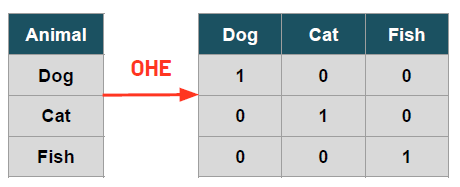

**Step 4: Create and set up the pipeline**

In [ ]:
my_pipeline = Pipeline(stages=stages)

**Step 5: Build the pipeline model**

In [ ]:
transformed_data = my_pipeline.fit(df).transform(df)

transformed_data.show(5)

+--------+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+--------------------+-------------+---------------+----------------+--------------------+---------------------+-------------+--------------+-------------------+--------------------+--------------+---------------+--------------------+
|ReviewId|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|Marital

**Step 6: Prepare final dataset for modeling**

In [ ]:
final_df = transformed_data.select('features', 'MonthlyIncome')

final_df.show(5)

+--------------------+-------------+
|            features|MonthlyIncome|
+--------------------+-------------+
|(23,[0,1,2,6,7,12...|         5130|
|(23,[0,1,2,4,7,12...|         2909|
|(23,[0,1,2,6,8,13...|         3468|
|(23,[0,1,2,5,7,13...|         3068|
|(23,[0,1,2,3,8,13...|         2670|
+--------------------+-------------+
only showing top 5 rows



**Step 7: Split the data into training and testing sets**

In [ ]:
#**Step 7: Split the data into training and testing sets**
training_data, test_data = final_df.randomSplit([0.8, 0.2], seed=42)


**Step 8: Create and train the Linear Regression model**

In [ ]:
#**Step 8: Create and train the Linear Regression model**
LinearRegression = LinearRegression(featuresCol='features', labelCol='MonthlyIncome')
#Let's build our simple linear regressuon model by fitting our SLR estimator
LinearRegression_model = LinearRegression.fit(training_data)



**Step 9: Make predictions on the test data**

In [ ]:
#**Step 9: Make predictions on the test data**
LinearRegression_predictions = LinearRegression_model.transform(test_data)

LinearRegression_predictions.show()

+--------------------+-------------+------------------+
|            features|MonthlyIncome|        prediction|
+--------------------+-------------+------------------+
|(23,[0,1,2,3,7,12...|         4257| 2855.003664922998|
|(23,[0,1,2,3,7,12...|         2703|  2721.49629609474|
|(23,[0,1,2,3,7,12...|         2723| 2882.505016270652|
|(23,[0,1,2,3,7,12...|         3944|2880.9575063737234|
|(23,[0,1,2,3,7,12...|         2115| 2670.065646554947|
|(23,[0,1,2,3,7,13...|         2074|2504.0159367516653|
|(23,[0,1,2,3,7,13...|         3038| 2471.720037457172|
|(23,[0,1,2,3,7,13...|         6074| 5552.093614081636|
|(23,[0,1,2,3,7,14...|         4559|6032.1137090858965|
|(23,[0,1,2,3,7,14...|         8639| 5703.920156230391|
|(23,[0,1,2,3,7,14...|         4649| 5970.720891713948|
|(23,[0,1,2,3,7,14...|         9419| 8956.038098322124|
|(23,[0,1,2,3,7,14...|         5376| 6007.522450263765|
|(23,[0,1,2,3,7,14...|         8446| 9205.204480886625|
|(23,[0,1,2,3,7,15...|         6499| 5611.287235

# Evaluation of the model

In [ ]:
linear_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='MonthlyIncome', metricName='rmse')

linear_RootMeanSquareOfError =linear_evaluator.evaluate(LinearRegression_predictions)

print(f"Root Mean Square of Error (RMSE): {linear_RootMeanSquareOfError}")


linear_evaluator_r2 = RegressionEvaluator(predictionCol='prediction', labelCol='MonthlyIncome', metricName='r2')

linear_r2 = linear_evaluator_r2.evaluate(LinearRegression_predictions)

print(f"Coefficient of Determination: {linear_r2}")

Root Mean Square of Error (RMSE): 1072.3293293790039
Coefficient of Determination: 0.9251239983897975


# CLASSIFICATION MODEL: Text Analysis

>In this part of the content, we'll try to perform a sentiment analysis that will use employees' feedback and categorise them as either negative or positive. Then using that classification, we're going to build a predictive model that will allow us to see for each employee, if he is likely to change his sentiment, implementing a Binary Classification (Logistic Regression) . Finally, we'll evaluate our model using different metrics and we'll interpret the result.

## Step 1: Extracting only the useful columns

In [ ]:
df.show()

+--------+---+---------+-----------------+---------+--------------------+----------------+---------+--------------+-------------+-----------------------+------+----------+--------------+--------+--------------------+---------------+-------------+-------------+-----------+------------------+--------+-----------------+-----------------+------------------------+-------------+----------------+-----------------+---------------------+---------------+--------------+------------------+-----------------------+--------------------+--------------------+-------------+
|ReviewId|Age|Attrition|   BusinessTravel|DailyRate|          Department|DistanceFromHome|Education|EducationField|EmployeeCount|EnvironmentSatisfaction|Gender|HourlyRate|JobInvolvement|JobLevel|             JobRole|JobSatisfaction|MaritalStatus|MonthlyIncome|MonthlyRate|NumCompaniesWorked|OverTime|PercentSalaryHike|PerformanceRating|RelationshipSatisfaction|StandardHours|StockOptionLevel|TotalWorkingYears|TrainingTimesLastYear|WorkL

In [ ]:
data = df.select('ReviewId', 'Feedback')


## Step 2: Data Preprocessing

We need to preprocess the text data before we can use it in our model. This involves tokenization, removing stop words, and converting the text to numerical features:

**1. Tokenization**

> Tokenisation is the process of separating text (such as a phrase) into distinct terms (typically words). This functionality is provided by the basic feature transformer *Tokeniser* class. The following example demonstrates how to divide sentences into word sequences.

In [ ]:
# Tokenize the text
tokenize = Tokenizer(inputCol='Feedback', outputCol='words')

tokenized_data = tokenize.transform(data)
tokenized_data.show(5, truncate=False)


+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|ReviewId|Feedback                                                                                                                                                                                                                           |words                                                                                                                                                                                                                                                   

**2.  StopWordsRemover**

>Stop words are words that should be removed from the input, often because they appear frequently and contain little significance.

>The feature transformer *StopWordsRemover* takes a sequence of strings as input (for example, the output of a Tokeniser) and removes all stop words. The stopWords option specifies a list of stop words. >

In [ ]:
# Remove stop words

remover = StopWordsRemover(inputCol='words', outputCol='cleaned_words')

removed_data = remover.transform(tokenized_data)
removed_data.show(5, truncate=False)


+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------+
|ReviewId|Feedback                                                                                                                                                                                                                           |words                                                                                                

**3.  HashingTF**

*HashingTF* is another feature that turns a collection of text documents into a fixed-size vector using the hashing method. It is especially beneficial when working with huge vocabularies since it reduces dimensionality while efficiently handling high-dimensional data.
***
**Use Cases:**

+ **Text Classification:** HashingTF is commonly used in text classification tasks where the high-dimensional data needs to be efficiently managed.

+ **Real-Time Processing:** Suitable for real-time text processing systems due to its computational efficiency and fixed-size output.

+ **Scalability:** Handles very large datasets effectively without needing to maintain a dynamic vocabulary.
***

>*CountVectorizer* is a feature extractor that transforms a set of text documents (each row) into a vector of token counts. This method is critical in natural language processing (NLP) and text mining because it converts textual input into numerical data that can be fed into machine learning algorithms. *CountVectorizer* converts text data into vectors that indicate the frequency of each word or character in the dataset.
***
>**Use Cases:**

+ ***Text Classification:*** CountVectorizer is commonly used in text classification tasks where the frequency of words is an important feature.

+ ***Clustering Text Data:*** It helps in clustering text documents based on word frequencies.

+ ***Feature Extraction:*** It is also used in feature extraction from text data for various NLP tasks.
***

In [ ]:
# Convert words to numeric vectors using Count Vectorizer
vectorize = CountVectorizer(inputCol='cleaned_words', outputCol='raw_features')
vectorized_model = vectorize.fit(removed_data)

vectorized_data = vectorized_model.transform(removed_data)

vectorized_data.show(5, truncate=False)

+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------+
|ReviewId|Feedback                                                                                                                                                                          

 5.  IDF

>*IDF* is an Estimator which is fit on a dataset and produces an IDFModel. The IDFModel takes feature vectors (generally created from HashingTF or CountVectorizer) and scales each feature. Intuitively, it down-weights features which appear frequently in a corpus.

In [ ]:
# Apply TF-IDF for weighted representation
idf = IDF(inputCol='raw_features', outputCol='features')
idfModel = idf.fit(vectorized_data)

idf_data = idfModel.transform(vectorized_data)

idf_data.show(5, truncate=False)

+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Step 3: Labeling the Data

>For sentiment analysis, we need labeled data. Since we don't have pre-existing labels, we'll use a simple heuristic approach to create labels based on the presence of positive or negative words:

In [ ]:
# Define lists of positive and negative words
positive_words = [
    "good", "great", "excellent", "happy", "satisfied", "wonderful", "fantastic",
    "amazing", "productive", "supportive", "innovative", "motivating", "friendly",
    "collaborative", "rewarding", "engaging", "inclusive", "flexible", "enjoyable",
    "inspiring", "nurturing", "thriving", "efficient", "professional", "respectful",
    "transparent", "empowering", "appreciative", "dynamic", "successful", "positive",
    "harmonious", "team-oriented", "growth-oriented", "smart"
]

negative_words = [
    "bad", "poor", "terrible", "unhappy", "dissatisfied", "awful", "horrible",
    "disappointing", "stressful", "unproductive", "toxic", "negative", "frustrating",
    "unmotivating", "unfair", "inefficient", "disrespectful", "hostile", "micromanaged",
    "unappreciated", "undervalued", "overworked", "underpaid", "chaotic", "disorganized",
    "political", "apathetic", "depressing", "uninspired", "isolating", "inflexible",
    "bureaucratic", "stagnant"
]


In [ ]:
# Create a UDF to label the sentiment
def label_sentiment(words):
    words = set(words)
    positive_count = sum(1 for word in positive_words if word in words)
    negative_count = sum(1 for word in negative_words if word in words)
    return 1 if positive_count > negative_count else 0

label_sentiment_udf = udf(label_sentiment, IntegerType())

label_data = idf_data.withColumn('label', label_sentiment_udf('cleaned_words'))


In [ ]:
label_data.select('ReviewId', 'Feedback', 'label').show(5, truncate=False)


+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|ReviewId|Feedback                                                                                                                                                                                                                           |label|
+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|100     |People are willing to share knowledge which is not the norm in this industry This is the first place I have worked where the people are great about that Also I get to work on cool projects that no one else in the world works on|1    |
|101     |To repeat 

In [ ]:
label_data.show()

+--------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|ReviewId|            Feedback|               words|       cleaned_words|        raw_features|            features|label|
+--------+--------------------+--------------------+--------------------+--------------------+--------------------+-----+
|     100|People are willin...|[people, are, wil...|[people, willing,...|(2859,[0,1,3,10,1...|(2859,[0,1,3,10,1...|    1|
|     101|To repeat what I ...|[to, repeat, what...|[repeat, wrote, p...|(2859,[0,1,8,957,...|(2859,[0,1,8,957,...|    1|
|     102|The variety of di...|[the, variety, of...|[variety, differe...|(2859,[4,21,100,1...|(2859,[4,21,100,1...|    1|
|     103|As youve probably...|[as, youve, proba...|[youve, probably,...|(2859,[0,2,3,16,6...|(2859,[0,2,3,16,6...|    1|
|     104|Great insurance b...|[great, insurance...|[great, insurance...|(2859,[3,13,16,18...|(2859,[3,13,16,18...|    1|
|     105|Perks and ince

## Step 4: Splitting the Data

>The training set will be used to train the model, and the testing set will be used to evaluate the model's performance.



In [ ]:
# Split the data
Feedback_data = label_data.select('ReviewId', 'features', 'label')

IDFtraining_data, IDFtest_data = Feedback_data.randomSplit([0.8, 0.2], seed=42)

## Step 5: Model Training

>Now we'll train a logistic regression model:

In [ ]:
# Create the Logistic Regression
SLR_Model = LinearRegression(featuresCol='features', labelCol='label')

#Let's build our simple linear regressuon model by fitting our SLR estimator
# Train the model
LinearRegression_model = SLR_Model.fit(IDFtraining_data)



TypeError: 'LinearRegression' object is not callable

In [ ]:
#**Step 9: Make predictions on the test data**
Feedback_LinearRegression_predictions = LinearRegression_model.transform(IDFtest_data)

Feedback_LinearRegression_predictions.show()


+--------+--------------------+-----+-------------------+
|ReviewId|            features|label|         prediction|
+--------+--------------------+-----+-------------------+
|     102|(2859,[4,21,100,1...|    1| 0.3135237831141445|
|     106|(2859,[7,39,53,54...|    0|0.10906379562941468|
|     108|(2859,[3,6,28,31,...|    1| 0.4260202543309464|
|     113|(2859,[1,3,72,282...|    1| 0.5053004184643031|
|     119|(2859,[0,2,7,10,1...|    1| 0.2720019336843289|
|     123|(2859,[1,6,11,21,...|    1|0.25550964379305946|
|     129|(2859,[0,2,14,16,...|    0| 0.5246124121836975|
|     135|(2859,[4,11,16,18...|    0| 0.2497423218039092|
|     145|(2859,[0,1,3,5,11...|    1|  1.139711283628579|
|     146|(2859,[0,1,4,9,10...|    1| 1.1694399918360623|
|     147|(2859,[3,8,13,16,...|    1| 0.6659546194190751|
|     149|(2859,[0,1,3,8,14...|    1| 0.6744965692449146|
|     151|(2859,[0,1,26,30,...|    0| 0.5165024954020141|
|     155|(2859,[1,3,4,8,15...|    1| 0.7049817191774141|
|     162|(285

Step 6 Evaluation of the Model

https://spark.apache.org/docs/latest/ml-guide.html